## Project: Wrangle and Analyze Data - WeRateDogs

### Gathering data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
%matplotlib inline
from bs4 import BeautifulSoup
import seaborn as sns

pd.set_option('display.max_colwidth', -1)

In [2]:
#reading csv file using pandas
df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#getting no of rows and columns in dataset
df.shape

(2356, 17)

In [4]:
#information about dataset such as name of columns, each column data type and no of null-not null objects
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
#getting TSV (tab seperated values by request module and writing in file)
import requests
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)    
img_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [6]:
len(df['tweet_id'])

2356

In [7]:
#####################################################
# This cell will take 20-30 minutes to run so you can skill this cell and directly go to next cell
#####################################################

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file

consumer_key = 
consumer_secret = 
access_token = 
access_secret = 

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w', encoding = 'utf8') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in df['tweet_id']:
        count += 1
        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print(str(count) + ": " + str(tweet_id) + "Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

# List of dictionaries to read tweet's JSON data line by line and later convert to a DataFrame
df_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                        'display_text_range': status['display_text_range']
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
status_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])

In [8]:
###############################################
#if you don't want to spend much time on upper process run this cell directly for tweet data. 
#Uncomment next line
###############################################

# status_df = pd.read_csv('tweet_csv.csv')

In [9]:
len(status_df)

2337

### Comparision of 3 different dataset

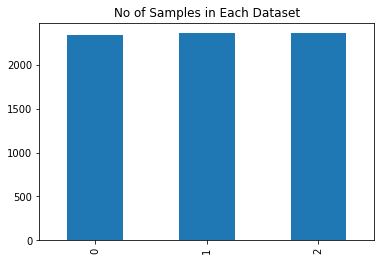

In [10]:
pd.Series([len(status_df),len(df['tweet_id']),df.shape[0]]).plot(kind='bar', title="No of Samples in Each Dataset")

- In all the dataset we have almost same amount of data so data is not scattered

In [11]:
# creating a copy of df as df, because using df is easier and faster instead of long names like df or twitter_achive
df = df.copy()

df columns

- **tweet_id**: unique no for any tweet

- **in_reply_to_status_id**: it will give original tweet id if your your tweet is reply of some other tweet
- **in_reply_to_user_id**: it will give original tweet author id if your your tweet is reply of some other tweet
- **timestamp**: date and time of tweet
- **source**: name of the device used to tweet i.e Twitter for Android, Twitter for iPhone, Twitter Web Client
- **text**: text of the status
- **retweeted_status_id**: it will give original tweet id if your your tweet is retweet of some other tweet
- **retweeted_status_user_id**: it will give original tweet author id if your your tweet is retweet of some other tweet
- **retweeted_status_timestamp**: time of retweet
- **expanded_urls**: tweet URL
- **rating_numerator**: rating of the dog 
- **rating_denominator**: rating of the dog out of 10
- **name**: name of the dog
- **doggo**: dog "stage"
- **floofer**: dog "stage"
- **pupper**: dog "stage"
- **puppo**: dog "stage"

In [12]:
# no of missing values for each columns
df.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

- `in_reply_to_status_id` `in_reply_to_user_id`,`retweeted_status_id`,`retweeted_status_user_id`,`retweeted_status_timestamp` has many null values which also can be seen from below plot

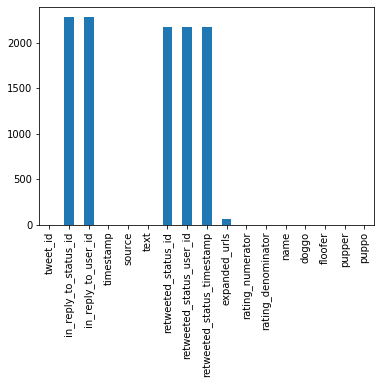

In [13]:
#plotting no of missing values so that we can easily get the idea that which columns can be removed
df.isnull().sum().plot(kind='bar')

### Dataset 2

`img_df` (tweet image predictions) columns:
    
- **tweet_id**: unique number for any tweet
- **jpg_url**: URL of dog's image
- **img_num**: dog's best photo using which rating has given
- **p1**: first algorithm for prediction of the dog image in the tweet
- **p1_conf**: confident score of the first algorithm
- **p1_dog**: prediction of first algorithm is dor or not
- **p2**: second algorithm for prediction of the dog image in the tweet
- **p2_conf**: confident score of the second algorithm
- **p2_dog**: prediction of second algorithm is dor or not
- **p3**: third algorithm for prediction of the dog image in the tweet
- **p3_conf**: confident score of the third algorithm
- **p3_dog**: prediction of second algorithm is dor or not

In [14]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


status_df (tweet status) columns:

- **id**: unique number of tweet
- **retweet_count**: number of retweet count of original tweet
- **favorite_count**: no of favorites or like of any tweet

### Dataset 3 (Fetched Twitter Data using Tweepy API)

In [15]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 6 columns):
tweet_id           2337 non-null int64
favorites          2337 non-null int64
retweets           2337 non-null int64
user_followers     2337 non-null int64
user_favourites    2337 non-null int64
date_time          2337 non-null object
dtypes: int64(5), object(1)
memory usage: 109.7+ KB


### Enlisting quality issues identified in df table

-  many tweet_id(s) of df table are missing in img_df (image predictions). So drop the tweet_ids that are not present in img_df
- `in_reply_to_status_id`, `in_reply_to_user_id`,`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` have a lot of missing values.
- Timestamp of the tweet should be in datetime format. So that data is converted to timestamp format.
- values of rating_numerator and rating_denominator has range between 0 to 10. But some values are higher than 10 which makes ration of numerator and denominator higher than 1
- Dataset contains retweet data too. So while fetching retweet data we are getting same content of data. So that duplicate data should be removed.
- some rating are too high which is not actual rating but some other data. That is outlier so we have to remove those outlier. 
- some columns contains same data but in different format so we have to make they uniform. 


#### img_df
- df file has 2376 values where as img_df has 2075 values so some of the tweets do not have image. 
- lack of uniformality in values of p1,p2, p3. This can create problem which making category. 


### Tidiness Issues
- doggo, floofer, pupper and puppo columns in df should be merged into one column named "stage"
- img_df table should be merged with df on tweet_id
- status_df table should be merged with df on tweet_id
- Merge `df` and `img_df` into `twitter_csv`.

### Cleaning the data

In [16]:
# creating a copy of tables before cleaning tasks are performed
twitter_csv = df.copy()
img_df_copy = img_df.copy()
twitter_api = status_df.copy()

In [17]:
twitter_csv = pd.merge(left=twitter_csv,
                                 right=img_df_copy, left_on='tweet_id', right_on='tweet_id', how='inner')

In [18]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
#twitter_csv should also now have only 2075 tweet_id(s)
twitter_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 28 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
jpg_url                       2075 

In [20]:
twitter_csv.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [21]:
twitter_csv = twitter_csv[twitter_csv['retweeted_status_id'].isnull()]

- Drop `retweeted_status_id`, `retweeted_status_user_id` , `retweeted_status_timestamp`,`in_reply_to_status_id`,`in_reply_to_user_id` from twitter_csv

In [22]:
twitter_csv.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id','in_reply_to_user_id'], axis = 1, inplace = True)

- Change datatype of timestamp variable to datetime using to_datetime function of pandas

In [23]:
twitter_csv['timestamp']=pd.to_datetime(twitter_csv['timestamp'])

In [24]:
# Extracting just the text from the HTML tags and storing in df['clean_source']
twitter_csv['source']=twitter_csv['source'].apply(lambda x: BeautifulSoup(x, "lxml").get_text())

In [25]:
twitter_csv['source'].value_counts()

Twitter for iPhone    1955
Twitter Web Client    28  
TweetDeck             11  
Name: source, dtype: int64

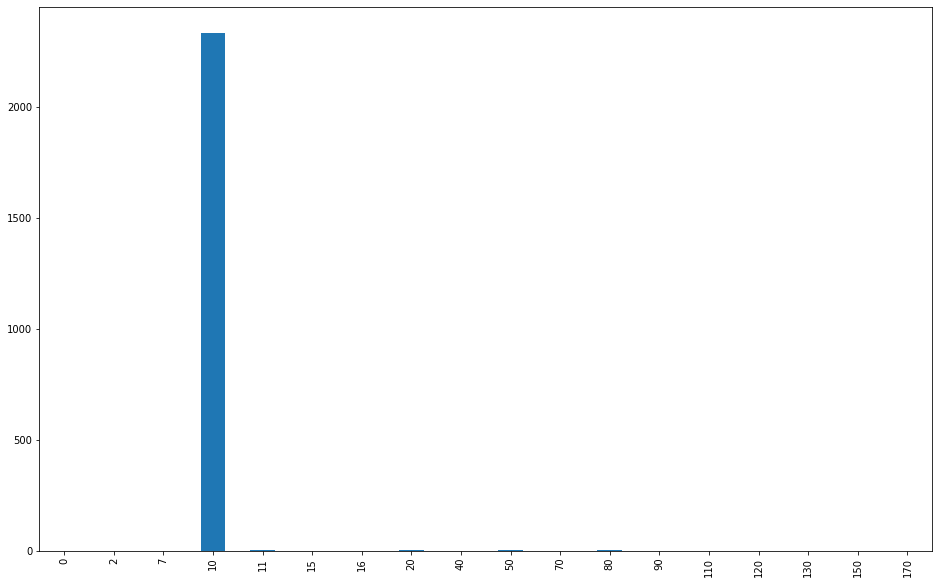

In [26]:
df['rating_denominator'].value_counts().sort_index().plot(kind='bar', figsize=(16,10))

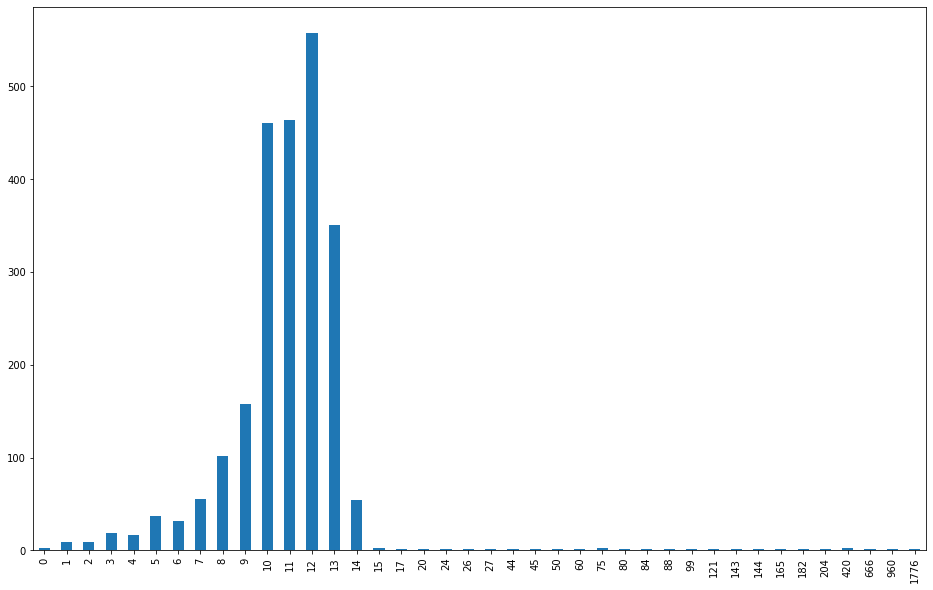

In [27]:
df['rating_numerator'].value_counts().sort_index().plot(kind='bar', figsize=(16,10))

In [28]:
twitter_csv = twitter_csv[twitter_csv['rating_denominator']>=10]
twitter_csv[twitter_csv['rating_denominator']==11][['text','rating_denominator']]
twitter_csv.loc[twitter_csv['rating_denominator']==11,'rating_denominator']=10
twitter_csv.loc[twitter_csv['rating_numerator']>14]['text']
twitter_csv[twitter_csv['text'].str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id','text','rating_numerator']]

C:\Users\iKhushPatel\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator
41,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
559,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
615,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1453,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


In [29]:
twitter_csv['rating_numerator'] = pd.to_numeric(twitter_csv.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)[0])
twitter_csv['rating_denominator'] = pd.to_numeric(twitter_csv.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)[1])
twitter_csv =  twitter_csv[twitter_csv['rating_numerator']<420]
twitter_csv['rating']=twitter_csv['rating_numerator']/twitter_csv['rating_denominator']
twitter_csv.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace = True)
twitter_csv['rating'].describe()

count    1990.000000
mean     1.054891   
std      0.218506   
min      0.000000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      1.400000   
Name: rating, dtype: float64

In [30]:
twitter_csv[twitter_csv['name'].apply(len)==1][['tweet_id', 'name','text']]
twitter_csv['name'] = twitter_csv['name'].replace("O","O'Malley")
twitter_csv['name'][twitter_csv['name'].str.match('[a-z]+')]= 'None'

C:\Users\iKhushPatel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
#Some dogs has multiple stages, will concatenate them.

twitter_csv.loc[twitter_csv.doggo == 'None', 'doggo'] = ''
twitter_csv.loc[twitter_csv.floofer == 'None', 'floofer'] = ''
twitter_csv.loc[twitter_csv.pupper == 'None', 'pupper'] = ''
twitter_csv.loc[twitter_csv.puppo == 'None', 'puppo'] = ''

twitter_csv.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

twitter_csv['dog_stage'] = twitter_csv.doggo + twitter_csv.floofer + twitter_csv.pupper + twitter_csv.puppo
twitter_csv.loc[twitter_csv.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
twitter_csv.loc[twitter_csv.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
twitter_csv.loc[twitter_csv.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

twitter_csv.loc[twitter_csv.dog_stage == '', 'dog_stage'] = 'None'

In [32]:
twitter_csv.dog_stage.value_counts()

None             1684
pupper           203 
doggo            63  
puppo            22  
doggo,pupper     9   
floofer          7   
doggo,puppo      1   
doggo,floofer    1   
Name: dog_stage, dtype: int64

In [33]:
twitter_csv.drop(columns=['doggo','floofer', 'pupper', 'puppo'], inplace=True)

In [34]:
twitter_csv.to_csv('twitter_archive_master.csv', index = False, encoding='utf-8')

In [35]:
# Append the first True predection to the list 'perdictions' and the level appended to list 'confidence_level',
# Otherwise, will append NaN.
predictions = []
confidence_level = []

def prediction_func(dataframe):
    if dataframe['p1_dog'] == True:
        predictions.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        predictions.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        predictions.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    else:
        predictions.append('NaN')
        confidence_level.append(0)

img_df_copy.apply(prediction_func, axis=1)
img_df_copy['prediction'] = predictions
img_df_copy['confidence_level'] = confidence_level



# Delete columns
img_df_copy = img_df_copy.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
                                                    'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

## Analyse and Visualize Data

### Que: People submitted data through which platform? 

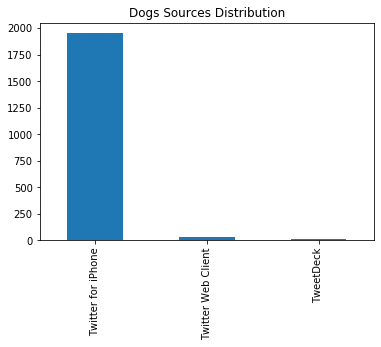

In [36]:
twitter_csv['source'].value_counts().plot(kind='bar', title='Dogs Sources Distribution')

### Que: People prefer which kind of dogs most? 

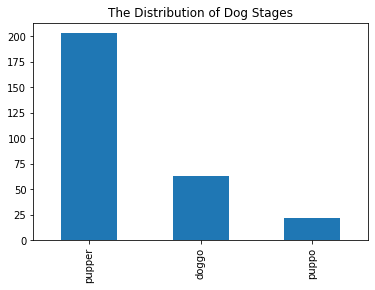

In [37]:
twitter_csv['dog_stage'].value_counts()[1:4].plot(kind='bar', title='The Distribution of Dog Stages')

### Que: Most famous names of the Dogs?

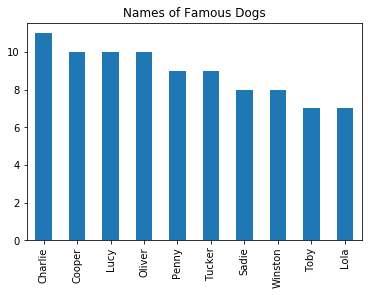

In [38]:
twitter_csv['name'].value_counts()[1:11].head(11).plot(kind='bar', title="Names of Famous Dogs")

In [39]:
twitter_csv['year_month']= twitter_csv['timestamp'].apply(lambda x: str(x.year) +"_"+ str(x.month) )

### Que: Time series of tweets posted

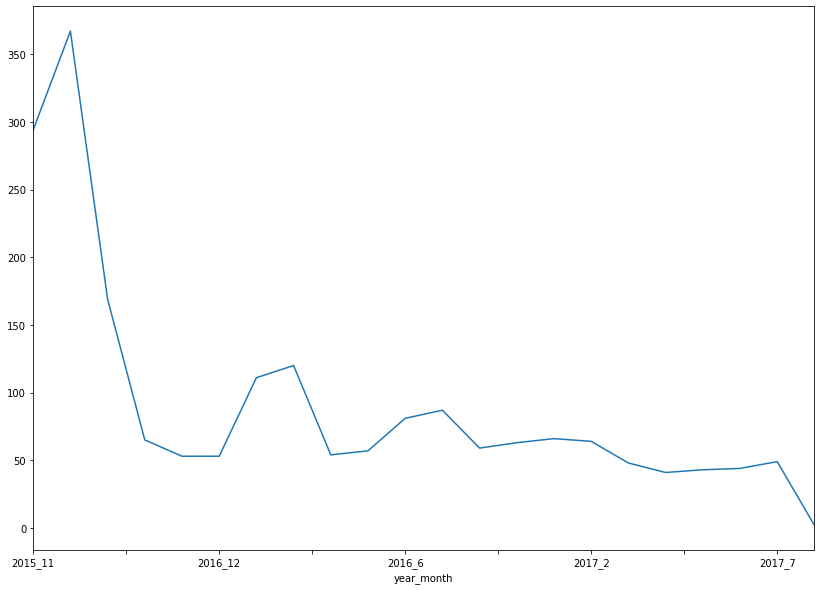

In [40]:
data = pd.DataFrame(twitter_csv.groupby('year_month')['tweet_id'].count())
data['tweet_id'].plot(kind = 'line', figsize=(14,10))

### Que: Average Rating of dogs by WeRateDogs twitter handle

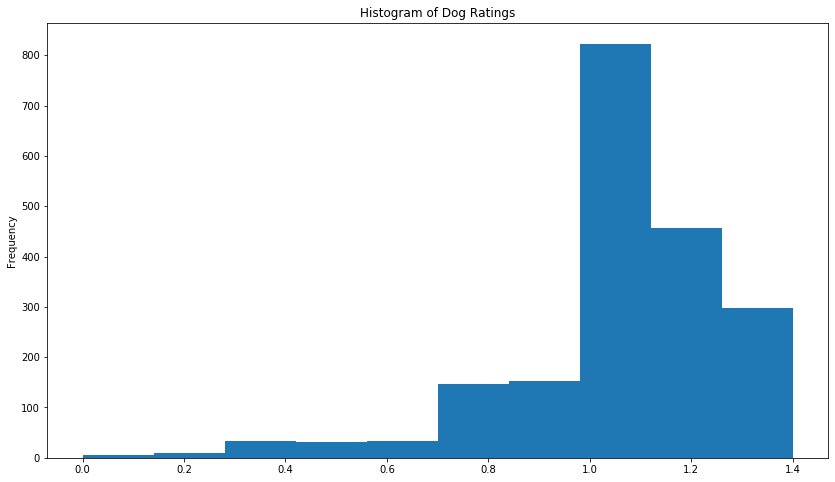

In [41]:
bins = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 1.1, 1.2, 1.3, 1.4]
twitter_csv.rating.plot(kind='hist', title = 'Histogram of Dog Ratings', figsize=(14,8))

### Que: Corelation of Retweets and Favourites

C:\Users\iKhushPatel\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


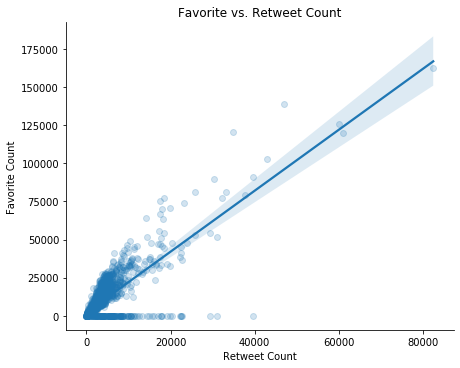

In [42]:

#twitter_api.plot(kind='scatter', x='retweets', y='favorites', figsize=(16,10), title="Corelation Coefficient "+str(round(twitter_api['retweets'].corr(twitter_api['favorites'], method='pearson', min_periods=None),3)))

# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="retweets", 
           y="favorites", 
           data=twitter_api,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');